In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
import pickle
import seaborn as sns
%matplotlib inline

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Individuos = pd.read_csv('/content/BDIndividuosTotal.csv',decimal=',')
Organizaciones = pd.read_csv('/content/BDOrganizacionesTotal.csv',decimal=',')
Individuos

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,82,105,106,107,108,109,110,111,112,119,120,121,134,169) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Edicion,S_1,S_2,I_92,I_93,I_6,I_7,I_8,I_9,I_10,I_11,I_13,I_14,I_15,I_16,I_19,I_20,I_21_1,I_21_2,I_21_3,I_22,I_23,I_24,I_26_1,I_26_2,I_26_3,I_27,I_29,I_33,I_34_1,I_34_2,I_34_3,I_34_4,I_40_1,I_40_2,I_40_3,I_40_4,I_40_5,I_32,I_46_1,...,I_18_1,I_18_2,I_18_3,I_18_4,I_18_5,I_18_6,I_18_7,I_18_8,I_18_9,I_18_10,I_18_11,I_18_12,I_18_13,I_90_1,I_90_2,I_90_3,I_90_4,I_90_5,I_90_6,I_90_7,I_90_8,I_90_9,I_90_10,I_91_1,I_91_2,I_91_3,I_91_4,I_91_5,I_91_6,I_91_7,I_91_8,I_91_9,I_91_10,CodZona,Zona,Condiciones Territoriales,Prácticas,Efectos,IPCM,I_18_14
0,2019,1,La 1001011\tLA AVANZADA,1\tPOPULAR,NaN,Femenino,1985.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,Empleado,No,"Derechos humanos, convivencia y ciudadanía",No,No,Si,La Junta de Acción Comunal,No,No,No,No,No,Adecuadas,No,Si,No,No,No,Mejoras para la ciudad y el país,"Ni de acuerdo, ni en desacuerdo",De acuerdo,De acuerdo,De acuerdo,4,5,1,1,5,Incompleta o Confusa,No lo conozco,...,Si,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Si,No,No,Si,No,Si,No,No,No,No,Si,No,No,Si,No,No,No,No,1.0,Nororiental,0.361795,0.387014,0.444633,0.40,NaN
1,2019,1,NaN,1\tPOPULAR,NaN,Masculino,1953.0,Sin pertenencia étnica,Ninguno,Básica Primaria,Empleado,Si,Jóvenes,No,No,No,NaN,No,Si,No,Si,Si,Regulares,Si,Si,No,Si,No,Beneficios para el barrio y la comuna,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,En desacuerdo,1,1,1,1,5,Suficiente y Clara,"Lo conozco, pero no lo he usado",...,Si,No,No,No,No,No,No,No,No,No,No,No,No,Si,Si,Si,No,No,Si,Si,Si,Si,Si,No,Si,Si,No,No,No,Si,No,No,Si,1.0,Nororiental,0.327151,0.461779,0.238168,0.33,NaN
2,2019,1,Chispero,NaN,NaN,Femenino,1970.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Ninguno,Oficios del hogar,No,Otro,No,No,No,NaN,No,No,No,No,No,Inadecuadas,Si,No,No,No,No,Mejoras para la ciudad y el país,De acuerdo,De acuerdo,De acuerdo,De acuerdo,1,4,1,1,4,No recibió,No lo conozco,...,Si,No,No,No,No,No,No,No,No,No,No,No,No,No,Si,Si,No,Si,No,No,Si,No,No,No,No,Si,No,Si,No,No,Si,No,No,1.0,Nororiental,0.299800,0.372017,0.673632,0.42,NaN
3,2019,1,Ca,1\tPOPULAR,NaN,Femenino,1989.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,Buscando trabajo,No,"Derechos humanos, convivencia y ciudadanía",No,No,Si,La alcaldía,No,No,No,No,No,Regulares,No,No,No,No,No,Mejoras para la ciudad y el país,De acuerdo,De acuerdo,De acuerdo,"Ni de acuerdo, ni en desacuerdo",3,3,4,4,4,Suficiente y Clara,"Lo conozco, pero no lo he usado",...,No,No,No,No,No,No,No,No,No,No,No,No,Si,Si,No,Si,Si,Si,Si,No,Si,No,No,No,No,No,No,No,Si,No,Si,No,No,1.0,Nororiental,0.558784,0.633542,0.323003,0.49,NaN
4,2019,1,1001001\tSANTO DOMINGO SABIO Nº,1\tPOPULAR,NaN,Femenino,1953.0,Mestizo,Ninguno,Ninguno,Voluntariado en actividades sociales o políticas,No,Adulto mayor,No,No,Si,La alcaldía,No,No,No,No,No,Adecuadas,No,No,No,No,No,Mejoras a nivel individual y familiar,De acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,2,1,1,1,3,Suficiente y Clara,No lo conozco,...,No,No,No,Si,No,No,No,No,No,No,No,No,No,No,No,Si,No,No,Si,No,Si,No,No,No,No,No,No,No,Si,No,Si,No,No,1.0,Nororiental,0.250183,0.521447,0.238168,0.31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7093,2017,8,1008017,NaN,NaN,Femenino,1992.0,Sin pertenencia étnica,Ninguno,Básica Secundaria,Oficios del hogar,Si,mujeres,No,No,No,Otro,No,Si,No,No,Otro,Inadecuadas,No responde,No responde,No responde,Si,No,Mejoras a nivel individual y familiar,"Ni de acuerdo, ni en desacuerdo","Ni de acuerdo, ni en desacuerdo","Ni de acuerdo, ni en desacuerdo","Ni de acuerdo, ni en desacuerdo",1,1,1,1,5,Suficiente y Clara,No lo conozco,...,No,No,No,No,No,No,No,No,No,Si,No,No,No,No,No,Si,No,Si,Si,No,Si,Si,Si,No,N

In [3]:
Individuos = Individuos[['S_1', 'I_6', 'I_7', 'I_8', 'I_9', 'I_10',
          "I_19",	"I_21_1",	"I_21_2",	"I_21_3", "I_22",	"I_23",	"I_24",	"I_26_1",	"I_26_2","I_26_3", "I_27",	"I_28_1", "I_29",
          "I_32",	"I_33",	"I_40_1", "I_40_2", "I_40_3", "I_40_4", "I_40_5",	"I_90_1", "I_90_2","I_90_3","I_90_4","I_90_5","I_90_6","I_90_7",
          "I_90_8","I_90_9","I_90_10",
          "I_31",	"I_35_1", "I_38",	"I_51_2", "I_51_3",	"I_51_4",	"I_52",	"I_54", "I_55",	"I_48_1", "I_48_2", "I_48_3", "I_48_4", "I_48_5",
          "I_48_6","I_48_7","I_48_8","I_48_9", "I_91_1","I_91_2","I_91_3","I_91_4","I_91_5","I_91_6","I_91_7","I_91_8","I_91_9","I_91_10",
          "I_30",	"I_41",	"I_44",	"I_45","I_47",
          'IPCM']]
Individuos['I_7'] = Individuos['I_7'].replace(np.nan, 9999, regex=True)
Individuos['I_8'] = Individuos['I_8'].replace(np.nan, 'Sin registro', regex=True)
Individuos['I_24'] = Individuos['I_24'].replace(-88, 'Sin registro', regex=True)
Individuos['I_35_1'] = Individuos['I_35_1'].replace(np.nan, 'Sin registro', regex=True)
Individuos['I_47'] = Individuos['I_47'].replace(np.nan, 'Sin registro', regex=True)
Individuos = Individuos.dropna()
# Individuos.to_excel('IndividuosIPCM.xlsx', index=False)
Individuos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,S_1,I_6,I_7,I_8,I_9,I_10,I_19,I_21_1,I_21_2,I_21_3,I_22,I_23,I_24,I_26_1,I_26_2,I_26_3,I_27,I_28_1,I_29,I_32,I_33,I_40_1,I_40_2,I_40_3,I_40_4,I_40_5,I_90_1,I_90_2,I_90_3,I_90_4,I_90_5,I_90_6,I_90_7,I_90_8,I_90_9,I_90_10,I_31,I_35_1,I_38,I_51_2,I_51_3,I_51_4,I_52,I_54,I_55,I_48_1,I_48_2,I_48_3,I_48_4,I_48_5,I_48_6,I_48_7,I_48_8,I_48_9,I_91_1,I_91_2,I_91_3,I_91_4,I_91_5,I_91_6,I_91_7,I_91_8,I_91_9,I_91_10,I_30,I_41,I_44,I_45,I_47,IPCM
0,1,Femenino,1985.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,Si,No,No,No,No,No,Adecuadas,No,Si,No,No,No ha sido amenazado para participar,No,Incompleta o Confusa,Mejoras para la ciudad y el país,4,5,1,1,5,No,No,Si,No,No,Si,No,Si,No,No,Si,No se han presentado conflictos,Si,De acuerdo,Desacuerdo,Desacuerdo,Si,No,No,4,3,3,3,3,4,3,3,3,No,No,Si,No,No,Si,No,No,No,No,Si,No,Si,Si,Mejorado,0.40
1,1,Masculino,1953.0,Sin pertenencia étnica,Ninguno,Básica Primaria,No,No,Si,No,Si,Si,Regulares,Si,Si,No,Si,No ha sido amenazado para participar,No,Suficiente y Clara,Beneficios para el barrio y la comuna,1,1,1,1,5,Si,Si,Si,No,No,Si,Si,Si,Si,Si,Si,No se han presentado conflictos,No,Totalmente desacuerdo,Totalmente desacuerdo,Totalmente desacuerdo,Si,Si,Si,3,3,3,4,5,4,3,1,5,No,Si,Si,No,No,No,Si,No,No,Si,Si,Si,Si,No,Mejorado,0.33
2,1,Femenino,1970.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Ninguno,No,No,No,No,No,No,Inadecuadas,Si,No,No,No,No ha sido amenazado para participar,No,No recibió,Mejoras para la ciudad y el país,1,4,1,1,4,No,Si,Si,No,Si,No,No,Si,No,No,No,No pertenezco a ninguna organización,No,Desacuerdo,De acuerdo,Desacuerdo,Si,No,No,3,3,3,3,3,3,3,3,3,No,No,Si,No,Si,No,No,Si,No,No,Si,No,No,No,Empeorado,0.42
3,1,Femenino,1989.0,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,Si,No,No,No,No,No,Regulares,No,No,No,No,No ha sido amenazado para participar,No,Suficiente y Clara,Mejoras para la ciudad y el país,3,3,4,4,4,Si,No,Si,Si,Si,Si,No,Si,No,No,Si,No se han presentado conflictos,No,"Ni de acuerdo, ni en desacuerdo","Ni de acuerdo, ni en desacuerdo","Ni de acuerdo, ni en desacuerdo",No,Si,Si,3,3,3,3,3,3,3,3,3,No,No,No,No,No,Si,No,Si,No,No,Si,No,Si,No,Mejorado,0.49
4,1,Femenino,1953.0,Mestizo,Ninguno,Ninguno,Si,No,No,No,No,No,Adecuadas,No,No,No,No,No ha sido amenazado para participar,No,Suficiente y Clara,Mejoras a nivel individual y familiar,2,1,1,1,3,No,No,Si,No,No,Si,No,Si,No,No,No,No se han presentado conflictos,Si,De acuerdo,De acuerdo,De acuerdo,Si,No,No,3,1,1,1,1,1,1,1,1,No,No,No,No,No,Si,No,Si,No,No,No,No,Si,No,Permanecido iguales,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7093,8,Femenino,1992.0,Sin pertenencia étnica,Ninguno,Básica Secundaria,No,No,Si,No,No,Otro,Inadecuadas,No responde,No responde,No responde,Si,No ha sido amenazado para participar,No,Suficiente y Clara,Mejoras a nivel individual y familiar,1,1,1,1,5,No,No,Si,No,Si,Si,No,Si,Si,Si,Si,No se han presentado conflictos,No,De acuerdo,De acuerdo,De acuerdo,Si,Si,No,4,5,1,4,4,4,4,5,5,No,No,No,No,No,No,No,No,No,No,Si,No,No,No,Sin registro,0.37
7094,8,Femenino,1993.0,Sin pertenencia étnica,Ninguno,Básica Primaria,No,No,Si,No,No,Otro,Inadecuadas,No responde,No responde,No responde,Si,No ha sido amenazado para participar,No,Suficiente y Clara,Mejoras a nivel individual y familiar,1,1,1,1,5,No,No,No,No,No,No,No,No,No,No,Si,No se han presentado conflictos,No,"Ni de acuerdo, ni en desacuerdo",De acuerdo,En desacuerdo,Si,Si,No,3,3,1,2,4,4,4,4,4,No,No,No,No,No,No,No,No,No,No,Si,No,No,No,Sin registro,0.37
7095,8,Femenino,1985.0,Sin pertenencia étnica,Desplazado,Básica Primaria,Si,No,Si,No,No,Otro,Inadecuadas,No responde,No responde,No responde,Si,No ha sido amenazado para participar,No,Suficiente y Clara,Benefi

In [4]:
X = np.array(Individuos.drop(['IPCM'],1))
Y = np.array(Individuos['IPCM'])
# X = Individuos.drop(['IPCM'],1)
# Y = Individuos['IPCM']

In [5]:
ordinalEncoder = OrdinalEncoder(categories="auto",dtype=np.float64,)
ordinalEncoder.fit(X)
X = ordinalEncoder.transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1234, shuffle = True) 

In [7]:
escalar = StandardScaler(with_mean=False)
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [9]:
lr = LinearRegression()
params = {'fit_intercept':('True', 'False'), 'copy_X':('True', 'False')}
lr_gs = GridSearchCV(lr, params, cv=5, verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [10]:
print("Mejores parámetros", lr_gs.best_params_)
print("Mejor estimador", lr_gs.best_estimator_)

Mejores parámetros {'copy_X': 'True', 'fit_intercept': 'True'}
Mejor estimador LinearRegression(copy_X='True', fit_intercept='True')


In [11]:
lr = LinearRegression(copy_X='True', fit_intercept='True')
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

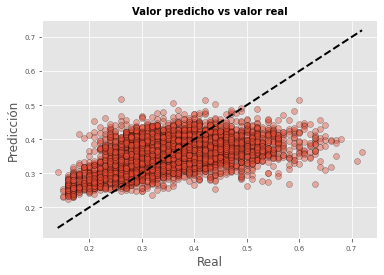

In [12]:
prediccion_train = lr.predict(X_train)
plt.figure(figsize=(6,4))
plt.scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
plt.title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.tick_params(labelsize = 7)

In [12]:
MAE = mean_absolute_error(y_test,lr_pred)
print(f"El error (MAE) de test es: {MAE}")
MSE = mean_squared_error(y_test,lr_pred,squared = False)
print(f"El error (MSE) de test es: {MSE}")
RMSE = sqrt(MSE)
print(f"El error (RMSE) de test es: {RMSE}")
r2 = r2_score(y_test,lr_pred)
print(f"El error (R2) de test es: {r2}")

El error (MAE) de test es: 0.06564417415115596
El error (MSE) de test es: 0.08545214765656844
El error (RMSE) de test es: 0.29232199311130946
El error (R2) de test es: 0.22684613221328453


In [13]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

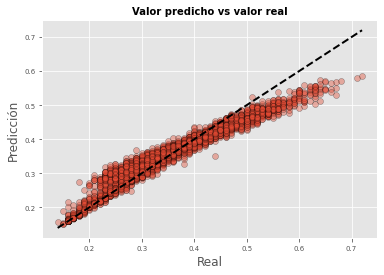

In [23]:
prediccion_train = rf.predict(X_train)
plt.scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
plt.title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.tick_params(labelsize = 7)

In [15]:
MAE = mean_absolute_error(y_test,rf_pred)
print(f"El error (MAE) de test es: {MAE}")
MSE = mean_squared_error(y_test,rf_pred,squared = False)
print(f"El error (MSE) de test es: {MSE}")
RMSE = sqrt(MSE)
print(f"El error (RMSE) de test es: {RMSE}")
r2 = r2_score(y_test,rf_pred)
print(f"El error (R2) de test es: {r2}")

El error (MAE) de test es: 0.054052649857278784
El error (MSE) de test es: 0.07630989024621561
El error (RMSE) de test es: 0.2762424483062218
El error (R2) de test es: 0.38343108405728066


In [16]:
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)
svr_pred = svr.predict(X_test)

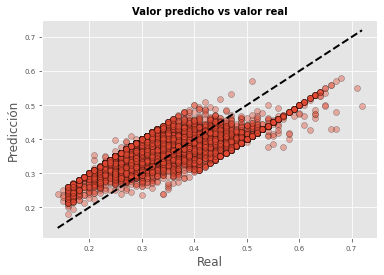

In [17]:
prediccion_train = svr.predict(X_train)
plt.scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
plt.title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.tick_params(labelsize = 7)

In [18]:
MAE = mean_absolute_error(y_test,svr_pred)
print(f"El error (MAE) de test es: {MAE}")
MSE = mean_squared_error(y_test,svr_pred,squared = False)
print(f"El error (MSE) de test es: {MSE}")
RMSE = sqrt(MSE)
print(f"El error (RMSE) de test es: {RMSE}")
r2 = r2_score(y_test,svr_pred)
print(f"El error (R2) de test es: {r2}")

El error (MAE) de test es: 0.06747257982708992
El error (MSE) de test es: 0.08612719701354242
El error (RMSE) de test es: 0.2934743549503813
El error (R2) de test es: 0.2145824609341226


In [19]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

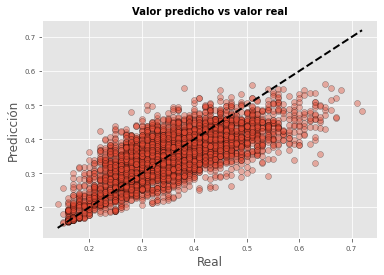

In [20]:
prediccion_train = knn.predict(X_train)
plt.scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
plt.title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.tick_params(labelsize = 7)

In [21]:
MAE = mean_absolute_error(y_test,knn_pred)
print(f"El error (MAE) de test es: {MAE}")
MSE = mean_squared_error(y_test,knn_pred,squared = False)
print(f"El error (MSE) de test es: {MSE}")
RMSE = sqrt(MSE)
print(f"El error (RMSE) de test es: {RMSE}")
r2 = r2_score(y_test,knn_pred)
print(f"El error (R2) de test es: {r2}")

El error (MAE) de test es: 0.07038058991436727
El error (MSE) de test es: 0.0945349342309034
El error (RMSE) de test es: 0.3074653382592961
El error (R2) de test es: 0.05375277014309765
